<a href="https://colab.research.google.com/github/HarikrishnanK9/Spam_Email_Detection/blob/main/NLP_Spam_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp '/content/drive/MyDrive/NLP_ML_Datasets/Phishing_Email.csv' '/content/'

In [ ]:
df=pd.read_csv("/content/Phishing_Email.csv")

In [ ]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
df['Email Type'].unique()

array(['Safe Email', 'Phishing Email'], dtype=object)

In [ ]:
df.dtypes

Unnamed: 0     int64
Email Text    object
Email Type    object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop(["Unnamed: 0"],inplace=True,axis=1)

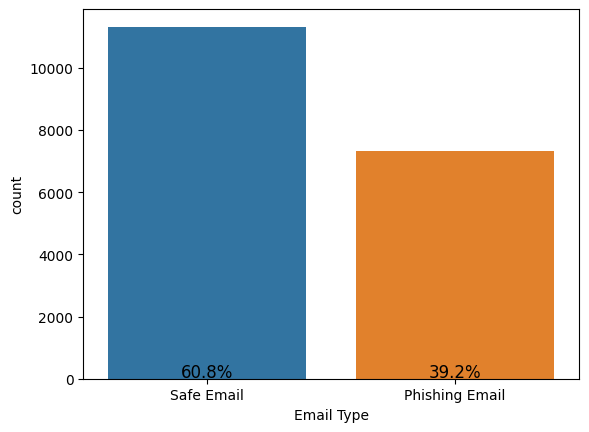

In [ ]:
percentage_counts = df['Email Type'].value_counts(normalize=True) * 100
sns.countplot(data = df,x="Email Type")
total_count = len(df)
for index, value in enumerate(percentage_counts):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=12, color='black')
plt.show()

* Dataset is imbalanced

In [ ]:
df["Email Type"]=df["Email Type"].map({"Safe Email":1,"Phishing Email":0})

In [ ]:
#num of characters
df['num_of_characters'] = df['Email Text'].apply(len)
df

,Email Text,Email Type,num_of_characters
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,1030
1,the other side of * galicismos * * galicismo *...,1,479
2,re : equistar deal tickets are you still avail...,1,1245
3,\nHello I am your hot lil horny toy.\n I am...,0,688
4,software at incredibly low prices ( 86 % lower...,0,441
...,...,...,...
18645,date a lonely housewife always wanted to date ...,0,237
18646,request submitted : access request for anita ....,1,477
18647,"re : important - prc mtg hi dorn & john , as y...",1,1214
18648,press clippings - letter on californian utilit...,1,213


In [ ]:
#num of words
df['no_of_words'] = df['Email Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Email Text,Email Type,num_of_characters,no_of_words
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,1030,230
1,the other side of * galicismos * * galicismo *...,1,479,91
2,re : equistar deal tickets are you still avail...,1,1245,305
3,\nHello I am your hot lil horny toy.\n I am...,0,688,116
4,software at incredibly low prices ( 86 % lower...,0,441,91


In [ ]:
#num of sentences
df['no_of_sentence'] = df['Email Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Email Text,Email Type,num_of_characters,no_of_words,no_of_sentence
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,1030,230,10
1,the other side of * galicismos * * galicismo *...,1,479,91,7
2,re : equistar deal tickets are you still avail...,1,1245,305,8
3,\nHello I am your hot lil horny toy.\n I am...,0,688,116,8
4,software at incredibly low prices ( 86 % lower...,0,441,91,13


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Email Type,18634.0,0.607599,0.488298,0.0,0.0,1.0,1.0,1.0
num_of_characters,18634.0,2755.654020,124867.657781,1.0,404.0,881.5,1880.0,17036692.0
no_of_words,18634.0,564.837018,26554.057222,0.0,82.0,179.0,382.0,3623496.0
no_of_sentence,18634.0,32.223999,1636.201561,0.0,5.0,9.0,19.0,223247.0


In [ ]:
df[df['Email Type']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Email Type,7312.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
num_of_characters,7312.0,1613.924508,3352.191512,1.0,355.0,732.0,1568.75,129635.0
no_of_words,7312.0,323.077681,619.708151,0.0,72.0,147.0,314.00,13291.0
no_of_sentence,7312.0,19.896882,52.268386,0.0,5.0,10.0,19.00,3093.0


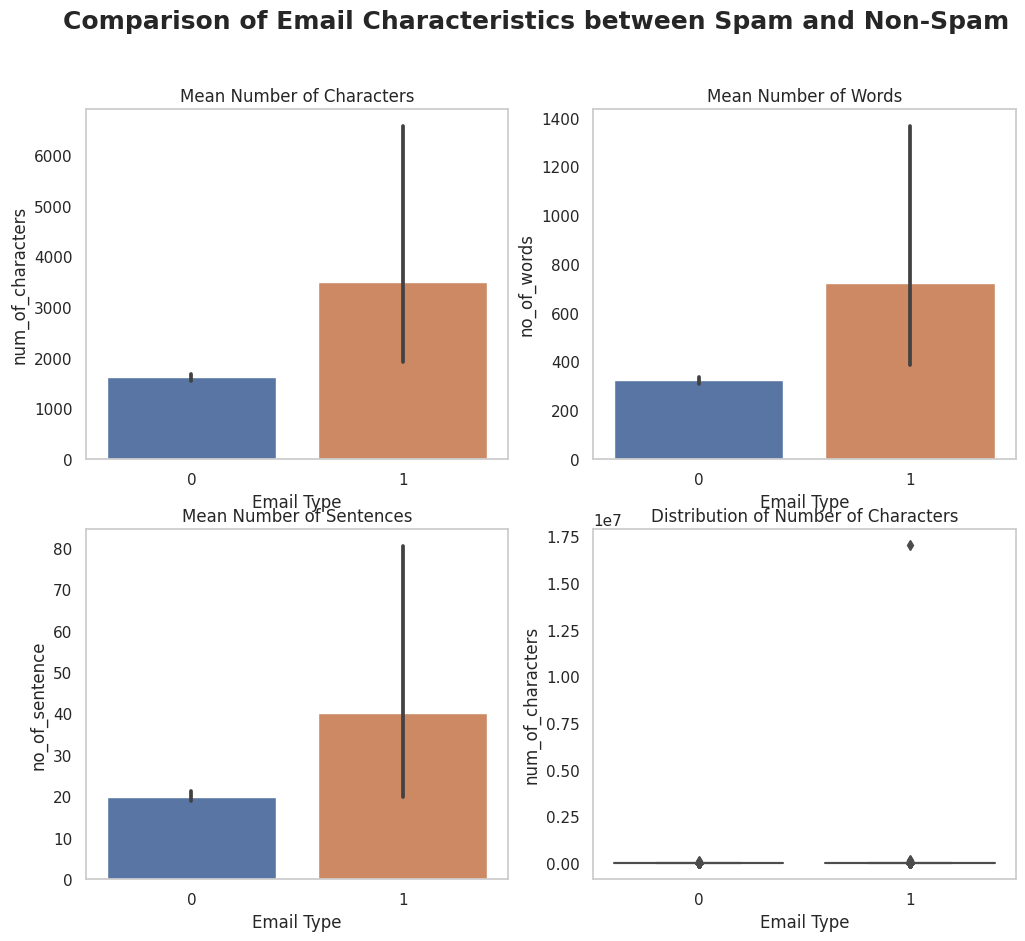

In [ ]:
sns.set_palette("Set2")
sns.set(style='whitegrid')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.barplot(x='Email Type', y='num_of_characters', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Mean Number of Characters')

sns.barplot(x='Email Type', y='no_of_words', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Mean Number of Words')

sns.barplot(x='Email Type', y='no_of_sentence', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Mean Number of Sentences')

sns.boxplot(x='Email Type',y='num_of_characters',data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Number of Characters')

fig.suptitle('Comparison of Email Characteristics between Spam and Non-Spam', fontsize=18, weight='bold')

for ax in axes.flatten():
    ax.grid(False)

plt.show()


In [ ]:
text=df["Email Text"]
text

0        re : 6 . 1100 , disc : uniformitarianism , re ...
1        the other side of * galicismos * * galicismo *...
2        re : equistar deal tickets are you still avail...
3        \nHello I am your hot lil horny toy.\n    I am...
4        software at incredibly low prices ( 86 % lower...
                               ...                        
18645    date a lonely housewife always wanted to date ...
18646    request submitted : access request for anita ....
18647    re : important - prc mtg hi dorn & john , as y...
18648    press clippings - letter on californian utilit...
18649                                                empty
Name: Email Text, Length: 18634, dtype: object

In [ ]:
text=text.str.replace("[^a-zA-z0-9]+"," ")
text

0        re 6 1100 disc uniformitarianism re 1086 sex l...
1        the other side of galicismos galicismo is a sp...
2        re equistar deal tickets are you still availab...
3         Hello I am your hot lil horny toy I am the on...
4        software at incredibly low prices 86 lower dra...
                               ...                        
18645    date a lonely housewife always wanted to date ...
18646    request submitted access request for anita dup...
18647    re important prc mtg hi dorn john as you disco...
18648    press clippings letter on californian utilitie...
18649                                                empty
Name: Email Text, Length: 18634, dtype: object

In [ ]:
sentence = "Hai hello world isn t I don t konw He is brillant in that field "
str1 = re.sub('[^a-zA-Z0-9]+'," ",sentence)
str1

'Hai hello world isn t I don t konw He is brillant in that field '

In [ ]:
from nltk.tokenize import word_tokenize
text = text.apply(lambda x:" ".join([w for w in word_tokenize(x) if len(w)>=3]))
text

0        1100 disc uniformitarianism 1086 sex lang dick...
1        the other side galicismos galicismo spanish te...
2        equistar deal tickets are you still available ...
3        Hello your hot lil horny toy the one you dream...
4        software incredibly low prices lower drapery s...
                               ...                        
18645    date lonely housewife always wanted date lonel...
18646    request submitted access request for anita dup...
18647    important prc mtg dorn john you discovered rec...
18648    press clippings letter californian utilities p...
18649                                                empty
Name: Email Text, Length: 18634, dtype: object

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
text=text.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
text

0        1100 disc uniformitarianism 1086 sex lang dick...
1        the other side galicismos galicismo spanish te...
2        equistar deal tickets are you still available ...
3        Hello your hot lil horny toy the one you dream...
4        software incredibly low prices lower drapery s...
                               ...                        
18645    date lonely housewife always wanted date lonel...
18646    request submitted access request for anita dup...
18647    important prc mtg dorn john you discovered rec...
18648    press clippings letter californian utilities p...
18649                                                empty
Name: Email Text, Length: 18634, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
text=text.apply(lambda x : [stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
text

0        1100 disc uniformitarian 1086 sex lang dick hu...
1        the other side galicismo galicismo spanish ter...
2        equistar deal ticket are you still avail assis...
3        hello your hot lil horni toy the one you dream...
4        softwar incred low price lower draperi sevente...
                               ...                        
18645    date lone housewif alway want date lone housew...
18646    request submit access request for anita dupont...
18647    import prc mtg dorn john you discov recent sti...
18648    press clip letter californian util pleas find ...
18649                                                empti
Name: Email Text, Length: 18634, dtype: object

In [ ]:
from nltk.corpus import stopwords
nltk.download
stop=stopwords.words("english")
text = text.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
text

0        1100 disc uniformitarian 1086 sex lang dick hu...
1        side galicismo galicismo spanish term name imp...
2        equistar deal ticket still avail assist robert...
3        hello hot lil horni toy one dream veri open mi...
4        softwar incred low price lower draperi sevente...
                               ...                        
18645    date lone housewif alway want date lone housew...
18646    request submit access request anita dupont enr...
18647    import prc mtg dorn john discov recent still o...
18648    press clip letter californian util pleas find ...
18649                                                empti
Name: Email Text, Length: 18634, dtype: object

In [ ]:
df['Transformed_Text']=text

In [ ]:
df.head()

,Email Text,Email Type,num_of_characters,no_of_words,no_of_sentence,Transformed_Text
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,1030,230,10,1100 disc uniformitarian 1086 sex lang dick hu...
1,the other side of * galicismos * * galicismo *...,1,479,91,7,side galicismo galicismo spanish term name imp...
2,re : equistar deal tickets are you still avail...,1,1245,305,8,equistar deal ticket still avail assist robert...
3,\nHello I am your hot lil horny toy.\n I am...,0,688,116,8,hello hot lil horni toy one dream veri open mi...
4,software at incredibly low prices ( 86 % lower...,0,441,91,13,softwar incred low price lower draperi sevente...


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=550,height=550,min_font_size=12,background_color='black')

In [ ]:
spam_wc = wc.generate(df[df['Email Type']==1]['Transformed_Text'].str.cat(sep=' '))

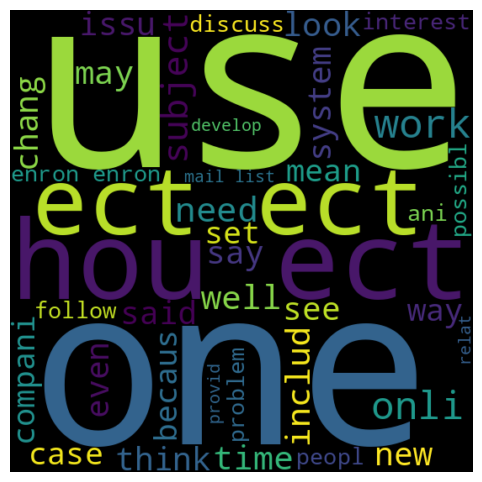

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc,interpolation='bilinear')
plt.axis('off')
plt.show()


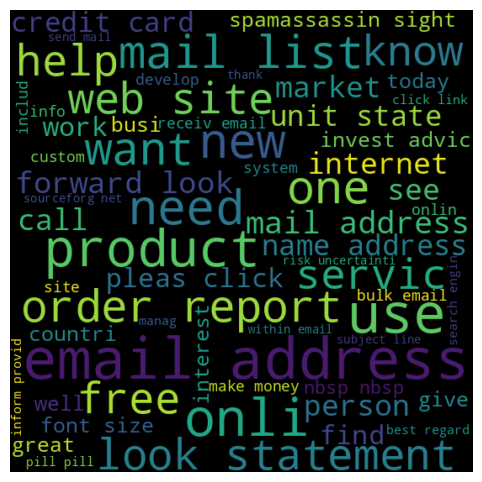

In [ ]:
not_spam_wc = wc.generate(df[df['Email Type']==0]['Transformed_Text'].str.cat(sep=' '))
plt.figure(figsize=(12,6))
plt.imshow(not_spam_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
spam_corpus = []
for msg in df[df['Email Type']==1]['Transformed_Text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [ ]:
len(spam_corpus)

3531057

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('languag', 23773),
 ('enron', 19277),
 ('univers', 18442),
 ('http', 16199),
 ('linguist', 15813),
 ('com', 15361),
 ('use', 13808),
 ('mail', 13460),
 ('one', 12417),
 ('inform', 11977),
 ('list', 11587),
 ('subject', 11530),
 ('paper', 11022),
 ('ect', 11014),
 ('would', 10852),
 ('www', 10570),
 ('new', 10404),
 ('pleas', 10324),
 ('work', 9614),
 ('ani', 9165),
 ('time', 8828),
 ('confer', 8575),
 ('address', 8566),
 ('also', 8486),
 ('like', 7950),
 ('includ', 7836),
 ('may', 7739),
 ('get', 7538),
 ('system', 7150),
 ('research', 7137)]

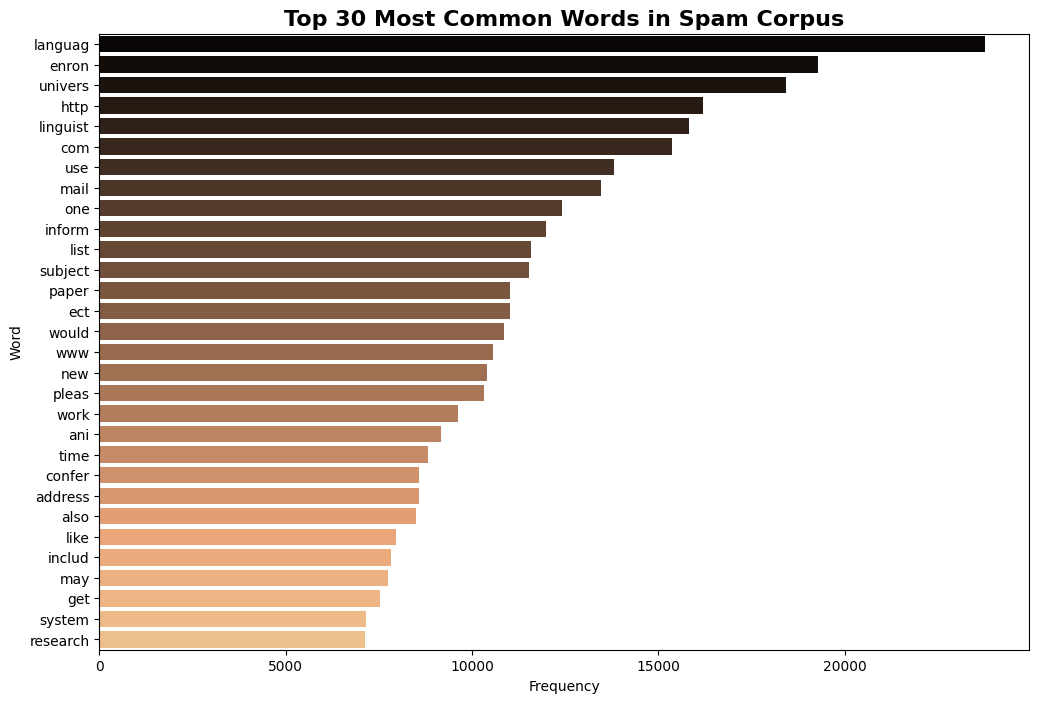

In [ ]:
word_frequencies = Counter(spam_corpus).most_common(30)
word_freq_df = pd.DataFrame(word_frequencies,columns=['Word','Frequency'])

plt.figure(figsize=(12,8))
sns.barplot(x='Frequency',y='Word',data=word_freq_df,palette='copper')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Spam Corpus',weight='bold',fontsize=16)
plt.show()

In [ ]:
non_spam_corpus = []
for msg in df[df['Email Type']==0]['Transformed_Text'].tolist():
  for words in msg.split():
    non_spam_corpus.append(words)

In [ ]:
len(non_spam_corpus)

1055135

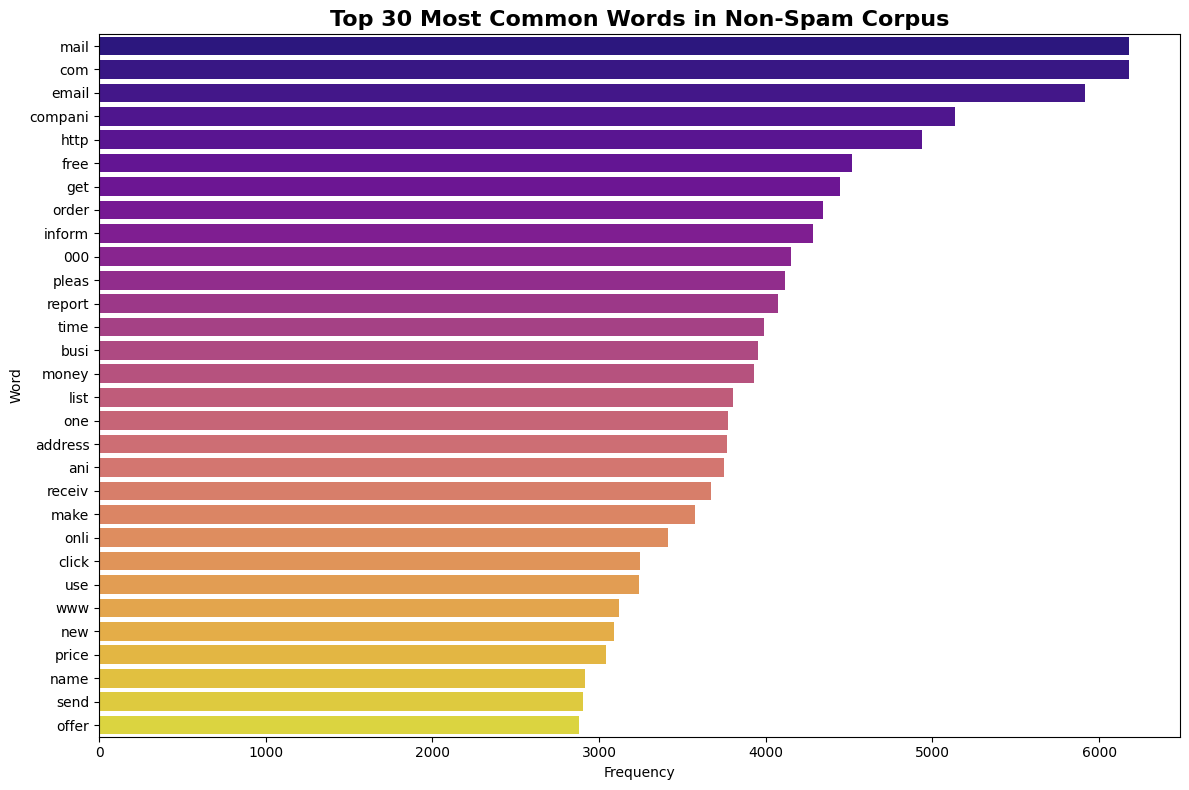

In [ ]:
word_frequencies_non_spam = Counter(non_spam_corpus).most_common(30)
word_freq_df_non_spam  = pd.DataFrame(word_frequencies_non_spam,columns=['Word','Frequency'])
plt.figure(figsize=(12,8))
sns.barplot(x='Frequency',y='Word',data=word_freq_df_non_spam,palette='plasma')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Non-Spam Corpus',weight='bold',fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
data=vec.fit_transform(text)
data

<18634x134208 sparse matrix of type '<class 'numpy.float64'>'
	with 1906590 stored elements in Compressed Sparse Row format>

In [ ]:
data.shape

(18634, 134208)

In [ ]:
y=df["Email Type"].values
y

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
X=data

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler with with_mean=False for sparse matrices
scaler = StandardScaler(with_mean=False)

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape

((13043, 134208), (5591, 134208))

In [ ]:
y_train.shape,y_test.shape

((13043,), (5591,))

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()
model.fit(X_resampled, y_resampled)
train_pred = model.predict(X_resampled)
train_accuracy = accuracy_score( y_resampled, train_pred)
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

In [ ]:
train_accuracy

0.9912181658512106

In [ ]:
test_accuracy

0.918261491683062

* train_accuracy>test_accuracy
* Indication of overfitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 30,random_state=42)
rfc.fit(X_resampled, y_resampled)
y_pred1=rfc.predict(X_test)
y_pred1

array([1, 0, 1, ..., 1, 0, 1])

0.9585047397603291
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2240
           1       0.97      0.96      0.97      3351

    accuracy                           0.96      5591
   macro avg       0.96      0.96      0.96      5591
weighted avg       0.96      0.96      0.96      5591



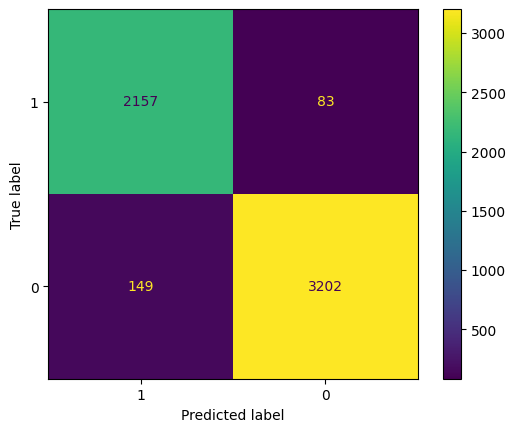

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

result=confusion_matrix(y_test,y_pred1)
labels=[1,0]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,random_state=42)
xgb.fit(X_resampled, y_resampled)
y_pred2=xgb.predict(X_test)
y_pred2

array([1, 0, 1, ..., 1, 0, 1])

0.9604721874441066
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2240
           1       0.99      0.95      0.97      3351

    accuracy                           0.96      5591
   macro avg       0.96      0.96      0.96      5591
weighted avg       0.96      0.96      0.96      5591



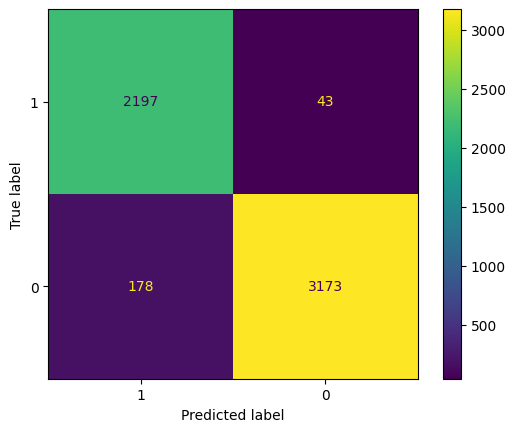

In [ ]:
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

result=confusion_matrix(y_test,y_pred2)
labels=[1,0]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
import pickle
pickle.dump(vec,open('/content/drive/MyDrive/NLP_ML_Datasets/vectorizer.pkl','wb'))
pickle.dump(xgb, open('/content/drive/MyDrive/NLP_ML_Datasets/model.pkl', 'wb'))